In [2]:
# Import necessary libraries
import pandas as pd

# Step 1: Load the contents of the uploaded Excel files
# Define file paths
excel_files = ['Police-Traffic.xlsx', 'Data_v1.0.xlsx', 'newdata-ekmcity.xlsx']

# Function to read all sheets from an Excel file
def read_all_sheets_from_excel(file_path):
    """Reads all sheets from an Excel file and returns them as a dictionary of DataFrames."""
    excel_data = pd.ExcelFile(file_path)
    dataframes = {sheet_name: excel_data.parse(sheet_name) for sheet_name in excel_data.sheet_names}
    return dataframes

# Read and display the data from each Excel file
for file in excel_files:
    print(f"Reading data from: {file}")
    dataframes = read_all_sheets_from_excel(file)
    for sheet, df in dataframes.items():
        print(f"\nFile: {file}, Sheet: {sheet}")
        print(df.head())  # Display the first 5 rows of the dataframe

print("\nExcel file loading and processing complete!")


Reading data from: Police-Traffic.xlsx

File: Police-Traffic.xlsx, Sheet: dashboard priority 
   sl_no                feature
0      1         TOTAL ACCIDENT
1      2   TOTAL FATAL ACCIDENT
2      3            TOTAL DEATH
3      4  TOTAL GREVIOUS INJURY
4      5     TOTAL MINOR INJURY

File: Police-Traffic.xlsx, Sheet: dummy JAN 2019
                  district        ps_name     fir_no date_report  \
0  THIRUVANANTHAPURAM CITY  Vattiyoorkavu  7000/2019  2019-01-13   
1  THIRUVANANTHAPURAM CITY     Vanchiyoor  7001/2019  2019-01-04   
2  THIRUVANANTHAPURAM CITY     Vanchiyoor  7002/2019  2019-01-02   
3  THIRUVANANTHAPURAM CITY     Vanchiyoor  7003/2019  2019-01-02   
4  THIRUVANANTHAPURAM CITY     Vanchiyoor  7004/2019  2019-01-08   

  date_accident time_report time_accident     sections    accident_type  \
0    2019-12-01    18:00:00      17:30:00  279,337,338     Minor Injury   
1    2019-12-31    11:25:00      06:30:00          279            Fatal   
2    2019-12-24    17:40:00   

In [3]:
# Import the pandas library
import pandas as pd

# Step 1: Load the data from the specified sheets
# Define file names and sheet names
police_traffic_2019 = pd.read_excel('Police-Traffic.xlsx', sheet_name='dummy JAN 2019')
police_traffic_2020 = pd.read_excel('Police-Traffic.xlsx', sheet_name='dummy JAN 2020')
newdata_ekmcity = pd.read_excel('newdata-ekmcity.xlsx', sheet_name='Sheet1')

# Step 2: Display the first few rows of each dataframe
print('Police Traffic 2019 Data:')
print(police_traffic_2019.head())  # Show the first 5 rows of the 2019 data

print('\nPolice Traffic 2020 Data:')
print(police_traffic_2020.head())  # Show the first 5 rows of the 2020 data

print('\nNew Data EKM City:')
print(newdata_ekmcity.head())  # Show the first 5 rows of the EKM city data


Police Traffic 2019 Data:
                  district        ps_name     fir_no date_report  \
0  THIRUVANANTHAPURAM CITY  Vattiyoorkavu  7000/2019  2019-01-13   
1  THIRUVANANTHAPURAM CITY     Vanchiyoor  7001/2019  2019-01-04   
2  THIRUVANANTHAPURAM CITY     Vanchiyoor  7002/2019  2019-01-02   
3  THIRUVANANTHAPURAM CITY     Vanchiyoor  7003/2019  2019-01-02   
4  THIRUVANANTHAPURAM CITY     Vanchiyoor  7004/2019  2019-01-08   

  date_accident time_report time_accident     sections    accident_type  \
0    2019-12-01    18:00:00      17:30:00  279,337,338     Minor Injury   
1    2019-12-31    11:25:00      06:30:00          279            Fatal   
2    2019-12-24    17:40:00      08:45:00    MO(Minor)  Grevious Injury   
3    2019-01-01    16:13:00      14:15:00  279,337,338  Grevious Injury   
4    2019-01-17    18:15:00      17:45:00  279,337,338  Grevious Injury   

   death  ...           spot_accident      weather          t_junction  \
0      0  ...           Near bus stop  S

In [7]:
# Convert date and time columns using the correct column names
df['Date_Accident'] = pd.to_datetime(df['date_accident'], errors='coerce')
df['Time_Accident'] = pd.to_datetime(df['time_accident'], errors='coerce').dt.time

# Extract time-based features
df['Hour'] = pd.to_datetime(df['time_accident'], errors='coerce').dt.hour
df['Day_of_Week'] = df['Date_Accident'].dt.day_name()
df['Month'] = df['Date_Accident'].dt.month

# Create severity score (weighted sum of deaths and injuries)
df['Severity_Score'] = df['death'].fillna(0) * 5 + df['grievous'].fillna(0) * 3 + df['minor'].fillna(0)

# Group data by location to identify hotspots
hotspots = df.groupby(['latitude', 'longitude']).agg({
    'Severity_Score': 'sum',  # Total severity score for each location
    'fir_no': 'count'        # Count of FIRs (accidents) for each location
}).reset_index()

# Rename columns for clarity
hotspots.columns = ['Latitude', 'Longitude', 'Total_Severity', 'Accident_Count']
# Sort by accident count to identify top hotspots
hotspots = hotspots.sort_values('Accident_Count', ascending=False)

# Analyze time patterns
time_patterns = df.groupby('Hour')['fir_no'].count().reset_index()
time_patterns.columns = ['Hour', 'Accident_Count']

# Display results
print("Top 10 Accident Hotspots:")
print(hotspots.head(10))  # Show top 10 hotspots

print("\nAccident Distribution by Hour:")
print(time_patterns.sort_values('Accident_Count', ascending=False).head(10))  # Show top 10 time patterns


Top 10 Accident Hotspots:
       Latitude  Longitude  Total_Severity  Accident_Count
1867   9.986095  76.254301            9558             118
2312  10.192600  76.386900             104              30
365    8.762900  76.791400              94              20
1774   9.966840  76.286430              32              12
1701   9.950929  76.257654              36              12
582    8.938711  76.677056              26              10
584    8.940531  76.656398              26              10
1253   9.659870  76.549040              40              10
3015  10.957620  76.505470              18               8
196    8.549300  76.977300              28               8

Accident Distribution by Hour:
    Hour  Accident_Count
18    18             770
19    19             746
9      9             602
8      8             593
17    17             590
15    15             544
16    16             538
11    11             532
20    20             528
14    14             519


C:\Users\levin\AppData\Local\Temp\ipykernel_10360\3780193045.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Accident'] = pd.to_datetime(df['time_accident'], errors='coerce').dt.time
C:\Users\levin\AppData\Local\Temp\ipykernel_10360\3780193045.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['time_accident'], errors='coerce').dt.hour


In [8]:
# Convert date and time columns with specified formats
df['Date_Accident'] = pd.to_datetime(df['date_accident'], errors='coerce')  # Format inferred automatically

# Specify the format for the time column (e.g., HH:MM:SS)
df['Time_Accident'] = pd.to_datetime(df['time_accident'], format='%H:%M:%S', errors='coerce').dt.time

# Extract time-based features
df['Hour'] = pd.to_datetime(df['time_accident'], format='%H:%M:%S', errors='coerce').dt.hour
df['Day_of_Week'] = df['Date_Accident'].dt.day_name()
df['Month'] = df['Date_Accident'].dt.month


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Define features and target variable
features = ['latitude', 'longitude', 'Hour', 'Day_of_Week', 'Month', 'weather', 'type_road', 'visibility']
target = 'Severity_Score'

# Step 2: Handle missing values and encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        # Handle numerical columns (impute missing values with the median)
        ('num', SimpleImputer(strategy='median'), ['latitude', 'longitude', 'Hour', 'Month']),
        # Encode categorical columns with OneHotEncoder (default sparse_output=True)
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Day_of_Week', 'weather', 'type_road', 'visibility'])
    ]
)

# Step 3: Create a pipeline with preprocessing and scaling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('scaler', StandardScaler(with_mean=False))  # Set with_mean=False for sparse matrices
])

# Step 4: Preprocess the data
X = df[features]  # Features dataframe
y = df[target]    # Target variable
X_preprocessed = pipeline.fit_transform(X)  # Apply preprocessing pipeline

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print('Data preprocessing complete. Training and testing sets are ready.')


Data preprocessing complete. Training and testing sets are ready.


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)  # You can tune `n_estimators` for better performance

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R-squared score

# Display evaluation metrics
print('Model Evaluation:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Model Evaluation:
Mean Squared Error: 1.41
R-squared: 0.99


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print('Cross-Validation R²:', scores.mean())


Cross-Validation R²: 0.9661916623791231


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Train the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 2: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 3: Get feature importances
feature_importances = model.feature_importances_

# Step 4: Get feature names
categorical_features = ['Day_of_Week', 'Weather', 'Type Road', 'Visibility']
numerical_features = ['Latitude', 'Longitude', 'Hour', 'Month']
feature_names = (
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist() +
    numerical_features
)

# Step 5: Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Step 7: Display top 10 features
print("Top 10 Most Important Features:")
print(importance_df.head(10))


Mean Squared Error: 1.41
R-squared: 0.99


ValueError: input_features is not equal to feature_names_in_

Categorical Features Extracted: ['Day_of_Week_Friday' 'Day_of_Week_Monday' 'Day_of_Week_Saturday'
 'Day_of_Week_Sunday' 'Day_of_Week_Thursday' 'Day_of_Week_Tuesday'
 'Day_of_Week_Wednesday' 'weather_Cloudy' 'weather_Dust Storm'
 'weather_Hail/Sleet' 'weather_Heavy rain' 'weather_Light rain'
 'weather_Mist/Fog' 'weather_Snow' 'weather_Sunny/Clear'
 'weather_Very Cold' 'weather_Very Hot' 'type_road_Bypass' 'type_road_MDR'
 'type_road_National Highway' 'type_road_ODR' 'type_road_Other Road'
 'type_road_State Highway' 'type_road_nan' 'visibility_Good'
 'visibility_Not Known' 'visibility_Poor']
Combined Feature Names: ['Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'weather_Cloudy', 'weather_Dust Storm', 'weather_Hail/Sleet', 'weather_Heavy rain', 'weather_Light rain', 'weather_Mist/Fog', 'weather_Snow', 'weather_Sunny/Clear', 'weather_Very Cold', 'weather_Very Hot', 'type_road

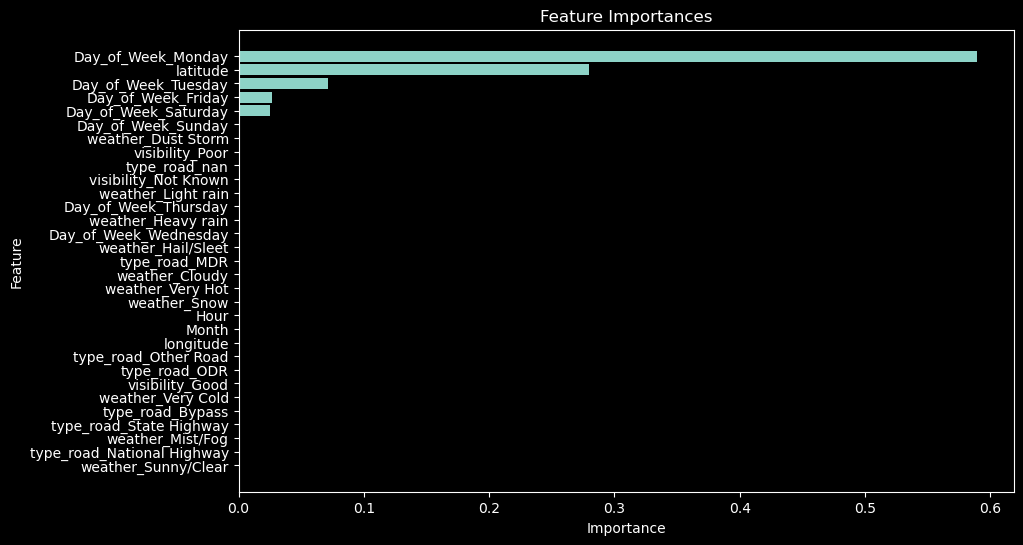

Top 10 Most Important Features:
                 Feature  Importance
1     Day_of_Week_Monday    0.589037
27              latitude    0.279821
5    Day_of_Week_Tuesday    0.071454
0     Day_of_Week_Friday    0.026433
2   Day_of_Week_Saturday    0.025167
3     Day_of_Week_Sunday    0.000808
8     weather_Dust Storm    0.000697
26       visibility_Poor    0.000683
23         type_road_nan    0.000564
25  visibility_Not Known    0.000507


In [29]:
# Extract the categorical feature names directly from the preprocessor
encoder = preprocessor.named_transformers_['cat']

# Dynamically extract the feature names the encoder was trained with
try:
    categorical_feature_names = encoder.get_feature_names_out()
except Exception as e:
    print("Error extracting categorical feature names:", e)
    categorical_feature_names = []

# Combine the categorical feature names with numerical features
numerical_features = ['latitude', 'longitude', 'Hour', 'Month']
feature_names = list(categorical_feature_names) + numerical_features

# Debugging: Print extracted feature names
print("Categorical Features Extracted:", categorical_feature_names)
print("Combined Feature Names:", feature_names)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display the top 10 features
print("Top 10 Most Important Features:")
print(importance_df.head(10))


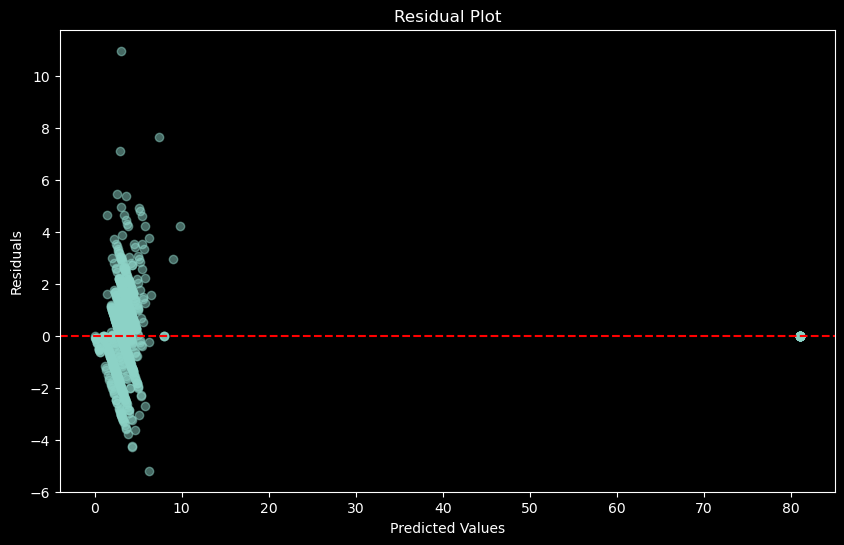

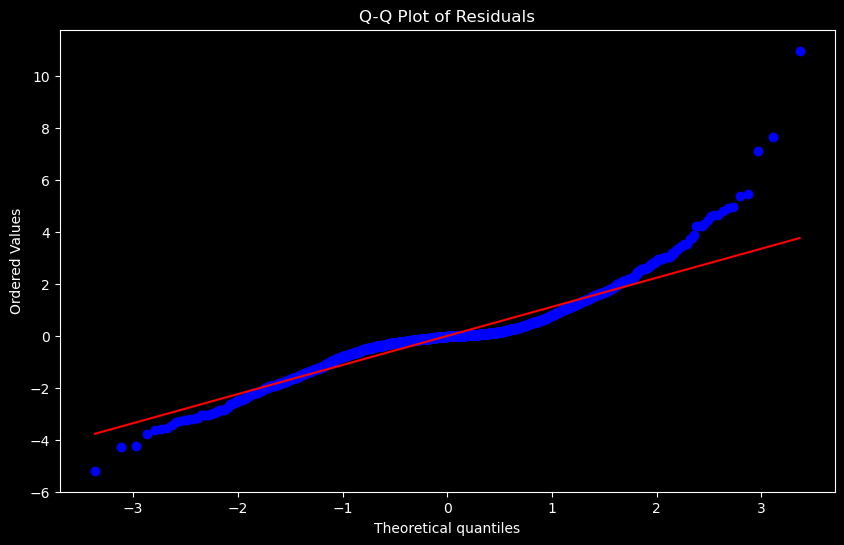

Residual Statistics:
  Statistic     Value
0      Mean -0.009890
1   Std Dev  1.186599
2  Skewness  1.060956
3  Kurtosis  7.919549


In [31]:
# Perform residual analysis
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# Calculate residuals
residuals = y_test - y_pred

# Step 1: Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Step 2: Q-Q Plot for Residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 3: Calculate Residual Statistics
residual_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Std Dev', 'Skewness', 'Kurtosis'],
    'Value': [
        np.mean(residuals),
        np.std(residuals),
        stats.skew(residuals),
        stats.kurtosis(residuals)
    ]
})

print("Residual Statistics:")
print(residual_stats)


Accident Analysis by Day of Week:
             Avg_Severity  Accident_Count  Total_Severity  Deaths  \
Day_of_Week                                                         
Tuesday              3.07            1407            4316     110   
Thursday             3.20            1377            4409     141   
Friday               3.10            1326            4105     126   
Wednesday            3.20            1313            4202     131   
Monday              10.33            1274           13162      98   
Sunday               3.20            1214            3889     115   
Saturday             3.26            1123            3658     111   

             Grievous_Injuries  Minor_Injuries  
Day_of_Week                                     
Tuesday                   1092             490  
Thursday                  1101             401  
Friday                    1027             394  
Wednesday                 1052             391  
Monday                    2203            6063  
S

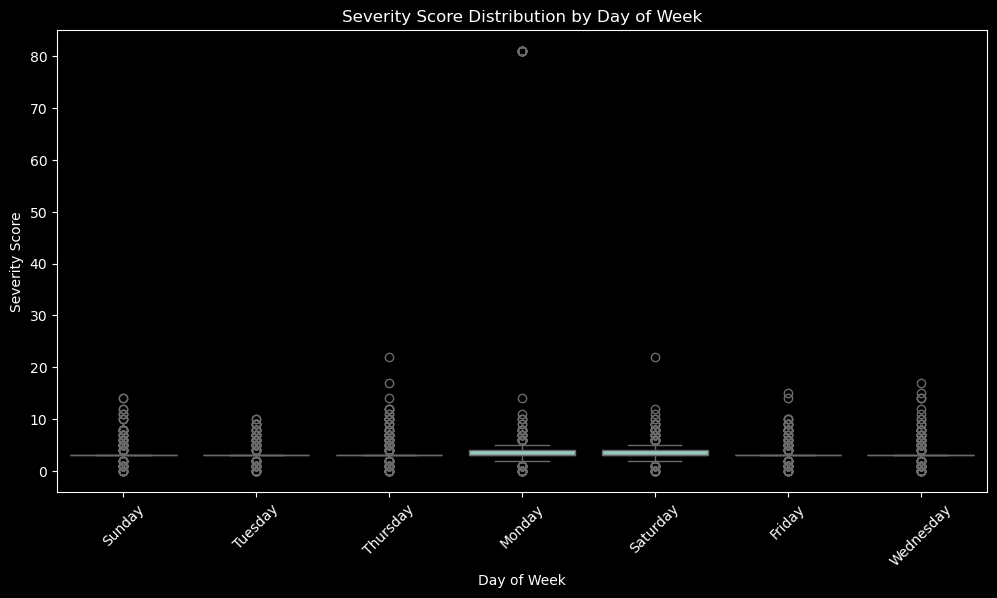


Percentage of Severe Accidents by Day:
Day_of_Week
Friday       22.62
Monday       31.40
Saturday     25.20
Sunday       23.97
Thursday     22.29
Tuesday      21.04
Wednesday    24.45
dtype: float64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate accident data by day of the week
day_analysis = df.groupby('Day_of_Week').agg({
    'Severity_Score': ['mean', 'count', 'sum'],  # Aggregate severity score
    'death': 'sum',                              # Sum of deaths
    'grievous': 'sum',                           # Sum of grievous injuries
    'minor': 'sum'                               # Sum of minor injuries
}).round(2)

# Flatten column names
day_analysis.columns = ['Avg_Severity', 'Accident_Count', 'Total_Severity', 'Deaths', 'Grievous_Injuries', 'Minor_Injuries']

# Sort by accident count
day_analysis = day_analysis.sort_values('Accident_Count', ascending=False)

print("Accident Analysis by Day of Week:")
print(day_analysis)

# Step 2: Visualize severity distribution by day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_Week', y='Severity_Score', data=df)
plt.title('Severity Score Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Severity Score')
plt.xticks(rotation=45)
plt.show()

# Step 3: Calculate percentage of severe accidents by day
severity_threshold = df['Severity_Score'].quantile(0.75)  # Define severe accident threshold
severe_accidents = df[df['Severity_Score'] > severity_threshold].groupby('Day_of_Week').size()
total_accidents = df.groupby('Day_of_Week').size()
severe_accident_pct = (severe_accidents / total_accidents * 100).round(2)

print("\nPercentage of Severe Accidents by Day:")
print(severe_accident_pct)


Number of outliers: 3743

Outlier Statistics:
count    3743.000000
mean        5.842372
std        13.780995
min         0.000000
25%         1.000000
50%         4.000000
75%         5.000000
max        81.000000
Name: Severity_Score, dtype: float64


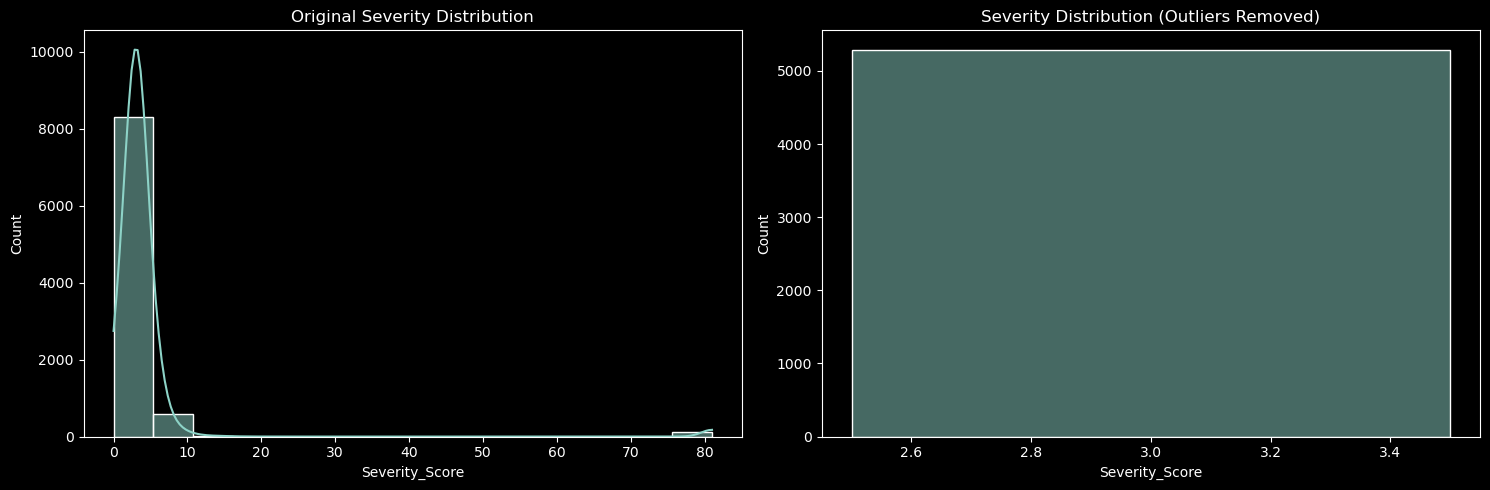


Percentage of data removed as outliers: 41.43%


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate IQR and identify outliers
Q1 = df['Severity_Score'].quantile(0.25)
Q3 = df['Severity_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Severity_Score'] < lower_bound) | (df['Severity_Score'] > upper_bound)]
print("Number of outliers:", len(outliers))
print("\nOutlier Statistics:")
print(outliers['Severity_Score'].describe())

# Step 2: Create a new dataset without outliers
df_no_outliers = df[(df['Severity_Score'] >= lower_bound) & (df['Severity_Score'] <= upper_bound)]

# Step 3: Compare distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='Severity_Score', ax=ax1, kde=True)
ax1.set_title('Original Severity Distribution')

sns.histplot(data=df_no_outliers, x='Severity_Score', ax=ax2, kde=True)
ax2.set_title('Severity Distribution (Outliers Removed)')

plt.tight_layout()
plt.show()

# Step 4: Calculate percentage reduction in data
percent_reduction = ((len(df) - len(df_no_outliers)) / len(df) * 100)
print(f"\nPercentage of data removed as outliers: {percent_reduction:.2f}%")


In [42]:
print("Number of features in X_train:", X_train.shape[1])


Number of features in X_train: 31


In [43]:
# Dynamically extract feature names from preprocessor
try:
    expanded_feature_names = preprocessor.get_feature_names_out()
    print("Feature names extracted from preprocessor.")
except AttributeError:
    print("Preprocessor does not support `get_feature_names_out`. Ensure it's properly fitted.")


Feature names extracted from preprocessor.


Feature names extracted from preprocessor.
Top 10 Most Important Features:
                         feature  importance
1                 num__longitude    0.604830
27            cat__type_road_nan    0.286460
5        cat__Day_of_Week_Monday    0.073135
2                      num__Hour    0.017472
0                  num__latitude    0.015593
13       cat__weather_Hail/Sleet    0.000285
26  cat__type_road_State Highway    0.000229
11           cat__weather_Cloudy    0.000220
3                     num__Month    0.000176
8      cat__Day_of_Week_Thursday    0.000169


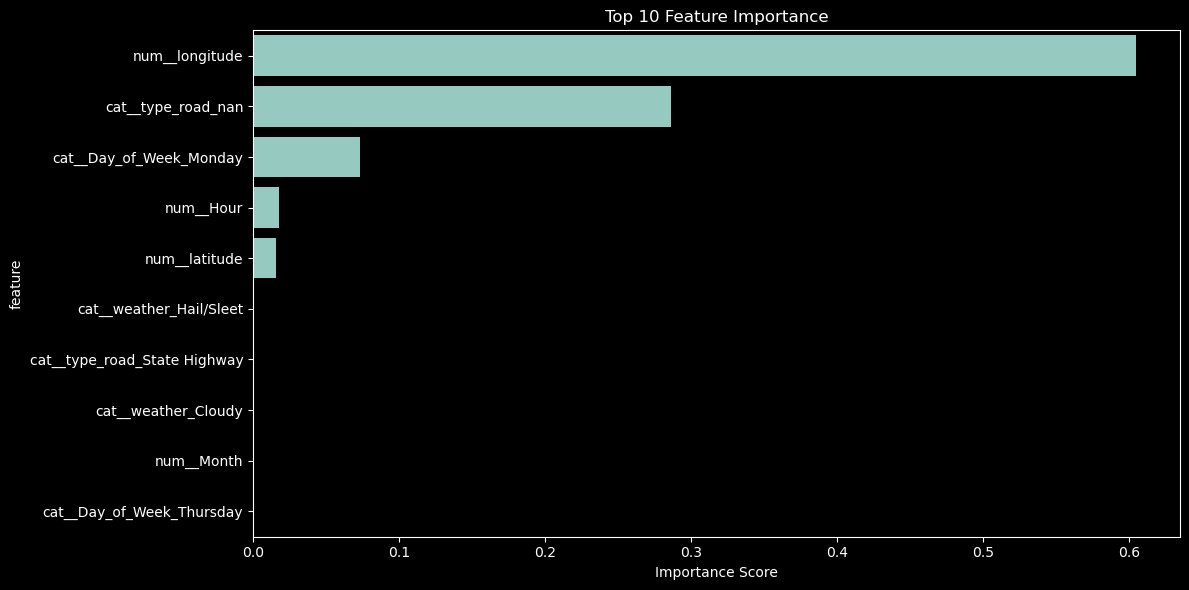

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a robust Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Step 2: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the model with scaled features
rf_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions
y_pred_new = rf_model.predict(X_test_scaled)

# Step 5: Define feature names
# Option 1: Dynamically extract feature names from preprocessor
try:
    expanded_feature_names = preprocessor.get_feature_names_out()
    print("Feature names extracted from preprocessor.")
except AttributeError:
    # Option 2: Manually define feature names
    expanded_feature_names = [f'feature_{i+1}' for i in range(X_train.shape[1])]
    print("Manually defined feature names.")

# Validate feature name length
if len(expanded_feature_names) != X_train.shape[1]:
    raise ValueError("The number of feature names must match the number of columns in X_train.")

# Step 6: Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': expanded_feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Step 7: Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


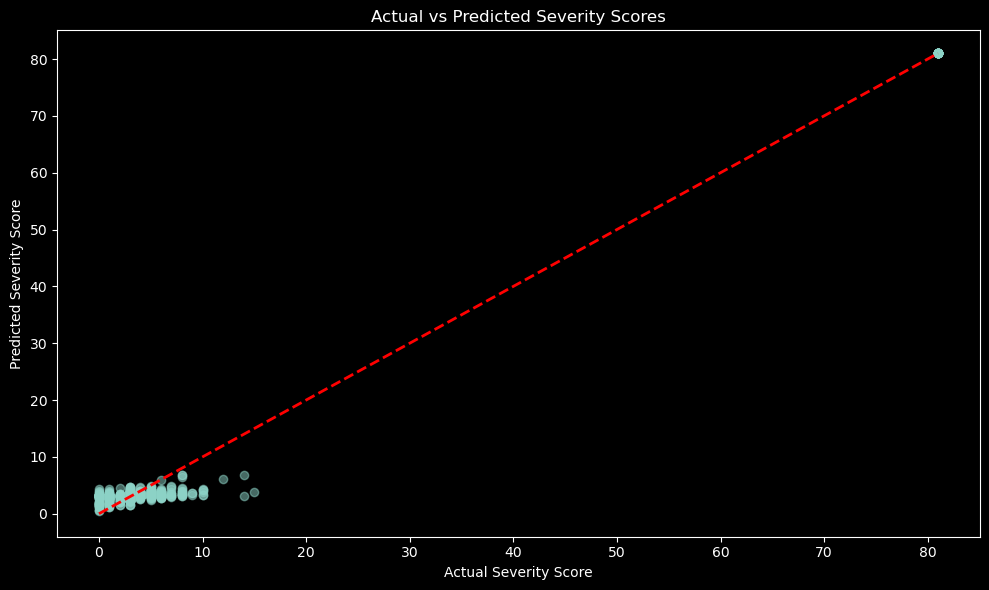

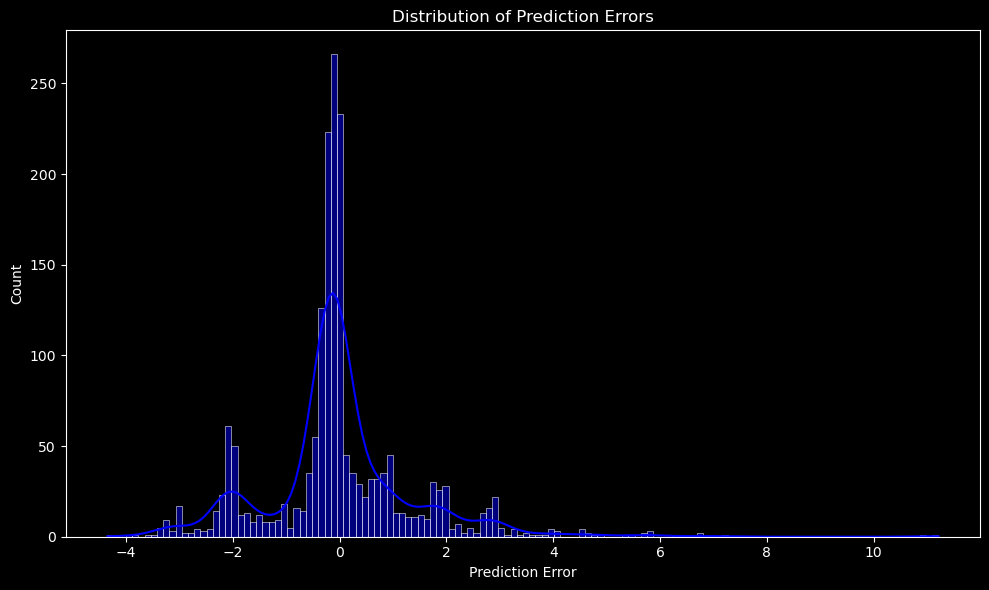

Detailed Performance Metrics:
Mean Absolute Error (MAE): 0.88
Median Absolute Error (MedAE): 0.36

Severity Score Distribution:
Severity_Score
Very Low     8912
Low             4
Medium          0
High            0
Very High     118
Name: count, dtype: int64


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Step 1: Scatter plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_new, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Severity Score')
plt.ylabel('Predicted Severity Score')
plt.title('Actual vs Predicted Severity Scores')
plt.tight_layout()
plt.show()

# Step 2: Distribution of prediction errors
prediction_errors = y_test - y_pred_new
plt.figure(figsize=(10, 6))
sns.histplot(prediction_errors, kde=True, color='blue')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

# Step 3: Performance metrics
mae = mean_absolute_error(y_test, y_pred_new)
medae = median_absolute_error(y_test, y_pred_new)

print("Detailed Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Median Absolute Error (MedAE): {medae:.2f}")

# Step 4: Severity score distribution
severity_dist = pd.cut(y, bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print("\nSeverity Score Distribution:")
print(severity_dist.value_counts().sort_index())


In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    n_jobs=-1,  # Use all processors
    verbose=2
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best MAE Score:", -grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best MAE Score: 0.8704117098203356


In [48]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define LightGBM model with GPU
lgbm_model = LGBMRegressor(
    device='gpu',  # Use GPU for training
    random_state=42
)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1,  # Use all CPU cores for data preparation
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best MAE Score:", -random_search.best_score_)

# Predict using the best model
best_lgbm_model = random_search.best_estimator_
y_pred_new = best_lgbm_model.predict(X_test_scaled)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 7227, number of used features: 26
[LightGBM] [Info] Using GPU Device: Intel(R) Arc(TM) Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 5 dense feature groups (0.06 MB) transferred to GPU in 0.002041 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 4.129929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [52]:
import joblib

# Save the trained LightGBM model
joblib.dump(random_search.best_estimator_, "best_lightgbm_model.pkl")
print("Model saved as best_lightgbm_model.pkl")


Model saved as best_lightgbm_model.pkl
